# CRIME DATA DATASET
 Using the crime_data Dataset to carry out kmeans clustering to group the states on the basis of crimes in to Most Dangerous, Dangerous & Least Dangerous.

## BUSINESS OBJECTIVE
* Maximize Awareness
* Identify Crime segments
* Maximize concentrated law enforcement efforts
* Minimize disorder in society
* Minimize Crime rate

## CONSTRAINTS
* Undetected or Unreported act of crime
* Credibility of the source of data


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                         | **Type** | **Relevance** |
|:--------:|:--------------------|:--------------------------------------------------------|:--------:|:-------------:|
| 1        | Unnamed:   0        | Name of States in USA                                   | Nominal  | Relevant      |
| 2        | Murder              | Murder rates   in different places of United States     | Ratio    | Relevant      |
| 3        | Assault             | Assualt rate   in different places of United States     | Ratio    | Relevant      |
| 4        | UrbanPop            | Urban   population in different places of United States | Ratio    | Relevant      |
| 5        | Rape                | Rape rate in   different places of United States        | Ratio    | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from feature_engine.outliers import Winsorizer
from termcolor import colored
from sklearn.cluster import AgglomerativeClustering

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:

df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass6\crime_data.csv")
df=df0.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### EXPLORATORY DATA ANALYSIS

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(50, 5)

In [4]:
df.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Unnamed: 0    50
Murder        43
Assault       45
UrbanPop      36
Rape          48
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [12]:
stats.mode(df)

ModeResult(mode=array([['Alabama', 2.1, 120, 66, 14.9]], dtype=object), count=array([[1, 2, 3, 4, 2]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [15]:
Range=df[['Murder','Assault','UrbanPop','Rape']].max()-df[['Murder','Assault','UrbanPop','Rape']].min()
Range

Murder       16.6
Assault     292.0
UrbanPop     59.0
Rape         38.7
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [16]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [17]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_14032\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

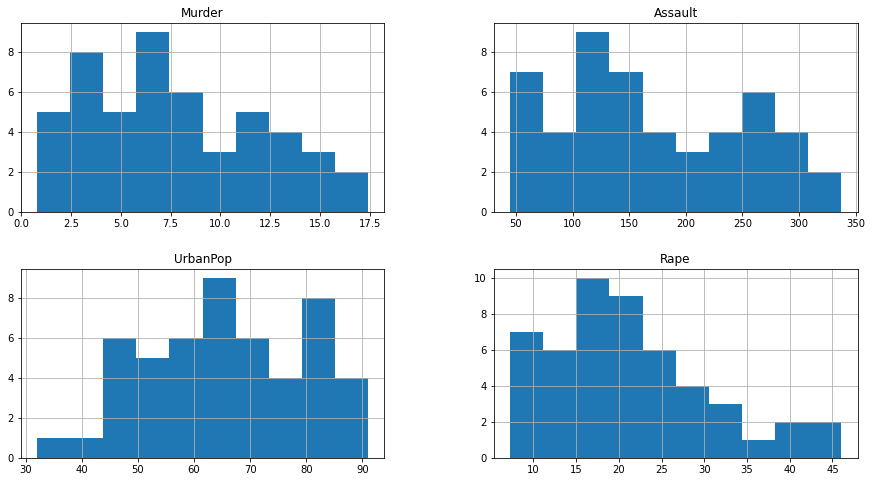

In [18]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


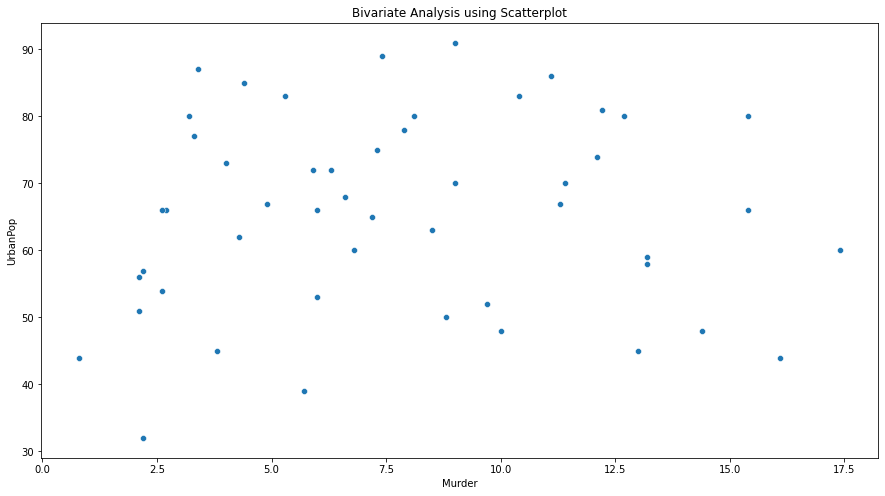

In [19]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Murder,df.UrbanPop)
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Murder'>

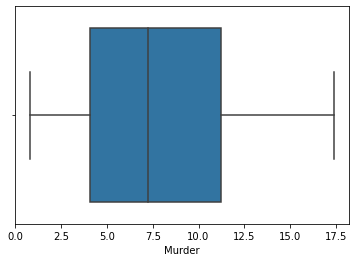

In [20]:
sns.boxplot(df["Murder"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Assault'>

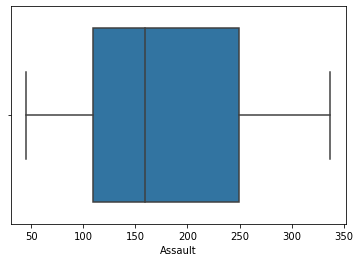

In [21]:
sns.boxplot(df['Assault'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UrbanPop'>

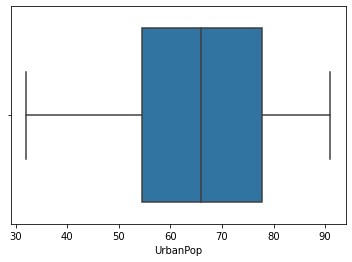

In [22]:
sns.boxplot(df['UrbanPop'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

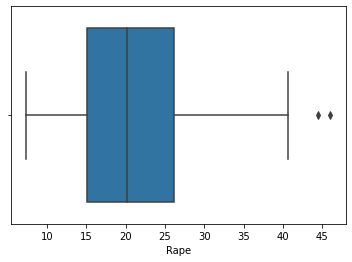

In [23]:
sns.boxplot(df['Rape'])

From the boxplots it is very evident that there are outliers in the dataset so using the below custom function calculated the number of outliers in each variable.

In [24]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [25]:
sum(outlier_func(df["Rape"]))

2

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [26]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=["Rape"])

df["Rape"]= winsor.fit_transform(df[["Rape"]])
sum(outlier_func(df["Rape"]))

0

Again plotting boxplots to show the difference in the boxplots after rectifying the outliers.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rape'>

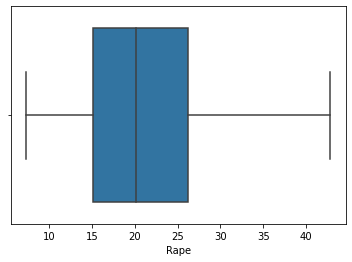

In [27]:
sns.boxplot(df.Rape)

Renaming the first column as it didn't make any sense into State as the column mentions all the states of USA

In [28]:
df.rename(columns={'Unnamed: 0':'State'},inplace=True)
df.head(2)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.200
1,Alaska,10.0,263,48,42.825


Removing the first column as it cannot be used for clustering so dropping it.

In [29]:
df1=df.drop(['State'],axis=1)
df1.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825


## NORMALIZATION
Before clustering the data is scaled using normalization 

Using the MinMaxScaler from sklearn.preprocessing library we do normalization and from the descriptive statistics we can see that the values are between 0 and 1.

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
df_minmax=pd.DataFrame(minmax.fit_transform(df1),columns=df1.columns,index=df1.index)
df_minmax.head(2)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.391274
1,0.554217,0.746575,0.271186,1.000000


In [31]:
df_minmax.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [32]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_minmax)
    TWSS.append(kmeans.inertia_)
TWSS

[6.7551821676223245,
 5.134910987938265,
 3.764333164167155,
 3.2620261753244018,
 2.896273000363276,
 2.6744214659613954,
 2.4755328659184253]

Text(0, 0.5, 'Total within SS')

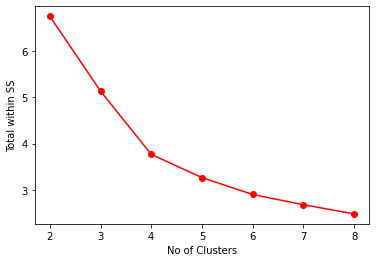

In [33]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the scree plot 4 number of clusters seem to be the most optimum number for kmeans clustering.

### NO OF CLUSTERS : 4

In [34]:
model=KMeans(n_clusters=4)
model.fit(df_minmax)
model.labels_
mb=pd.Series(model.labels_)
df_minmax4= df.copy()
df_minmax4['clust']=mb
df_minmax4.head(3)

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.200,2
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1


In [35]:
df_minmax4.groupby(['clust']).count()

,State,Murder,Assault,UrbanPop,Rape
clust,,,,,
0,13,13,13,13,13
1,13,13,13,13,13
2,8,8,8,8,8
3,16,16,16,16,16


In [36]:
df_minmax4.groupby(['clust']).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,32.819231
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


Text(0, 0.5, 'Murder')

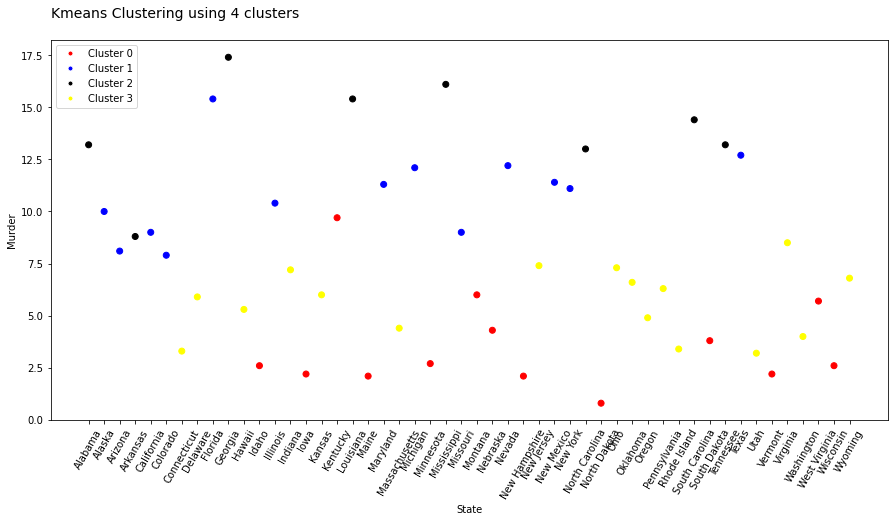

In [37]:
plt.figure(figsize=(15,7))
a4 = df_minmax4.clust.map({0:'red', 1:'blue', 2:'black',3:'yellow'})
plt.scatter(df_minmax4['State'],df_minmax4['Murder'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('State')
plt.ylabel('Murder')

#### INSIGHTS
* Cluster 0 : Medium Crime rate.
* Cluster 1 : High Crime rate.
* Cluster 2 : low crime rate.
* Cluster 3 : Very High crime rate.

## STANDARDIZATION
Using standardization to carry out the scaling of the data to generalize the data.

In [39]:
from sklearn.preprocessing import StandardScaler
stdscaled=StandardScaler()
df_stdscaled=pd.DataFrame(stdscaled.fit_transform(df1),columns=df1.columns,index=df1.index)
df_stdscaled.head(2)

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,0.007199
1,0.513019,1.118060,-1.224067,2.402325


In [40]:
df_stdscaled.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,6.306067e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.532327e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.711890e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.146338e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.582166e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.402325e+00


### SCREE PLOT
Creating the Scree plot to get an idea about the number of clusters to choose for Kmeans Clustering.

In [41]:
from sklearn.cluster import KMeans
TWSS=[]
k=list(range(2,9))
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_stdscaled)
    TWSS.append(kmeans.inertia_)
TWSS

[104.56313768454173,
 79.49010272314425,
 57.039598456699835,
 49.7679276228847,
 45.36127665377591,
 39.54918451875356,
 35.51574177851042]

Text(0, 0.5, 'Total within SS')

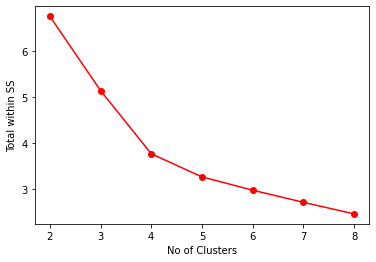

In [45]:
plt.plot(k,TWSS,'ro-');plt.xlabel("No of Clusters"); plt.ylabel("Total within SS")

From the scree plot 4 number of clusters seem to be the most optimum number for kmeans clustering.

### NO OF CLUSTERS : 4

In [46]:
model=KMeans(n_clusters=4)
model.fit(df_stdscaled)
model.labels_
mb=pd.Series(model.labels_)
df_stdscaled4= df.copy()
df_stdscaled4['clust']=mb
df_stdscaled4.head(3)

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.200,2
1,Alaska,10.0,263,48,42.825,1
2,Arizona,8.1,294,80,31.000,1


In [47]:
df_stdscaled4.groupby(['clust']).count()

,State,Murder,Assault,UrbanPop,Rape
clust,,,,,
0,13,13,13,13,13
1,13,13,13,13,13
2,8,8,8,8,8
3,16,16,16,16,16


In [48]:
df_stdscaled4.groupby(['clust']).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,32.819231
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250


Text(0, 0.5, 'Murder')

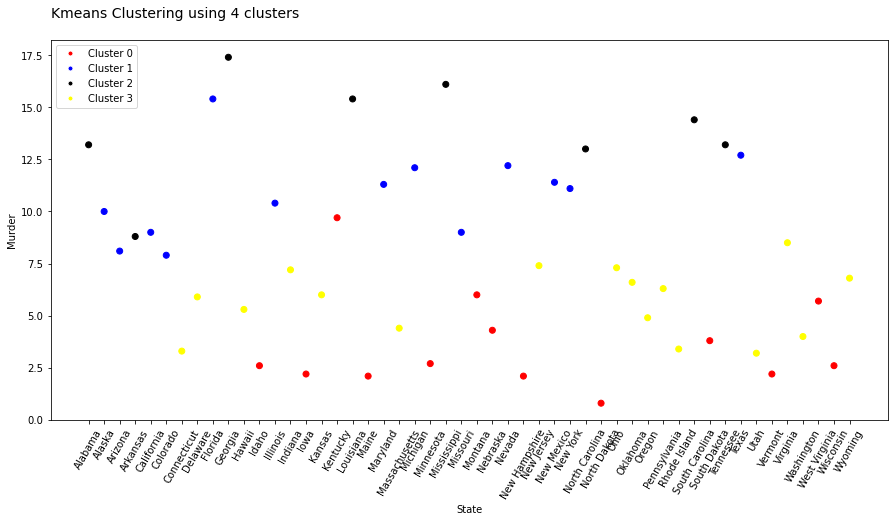

In [49]:
plt.figure(figsize=(15,7))
a4 = df_stdscaled4.clust.map({0:'red', 1:'blue', 2:'black',3:'yellow'})
plt.scatter(df_stdscaled4['State'],df_stdscaled4['Murder'], c=a4)

from matplotlib.lines import Line2D
colors=['red','blue','black','yellow']
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
               markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

plt.legend(handles=legend_elements, loc='upper left')
plt.title('Kmeans Clustering using 4 clusters\n', loc='left', fontsize=14)
plt.xticks(rotation=60)
plt.xlabel('State')
plt.ylabel('Murder')


#### INSIGHTS
* Cluster 0 : low crime rate.
* Cluster 1 : Very High crime rate.
* Cluster 2 : High Crime rate.
* Cluster 3 : Medium Crime rate.

## CONCLUSION
From the above insights we can group States in to the following crime areas:
* __Very High Crime__ : This group has a very high crime rate and the urban population in these states are also high. The states which have a very high crime rate are mentioned below.

In [51]:
dfa=df_minmax4[df_minmax4.clust==3]
dfa.State

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: State, dtype: object

* __High Crime__ : This group has a high crime rate and the urban population in these states are also comparatively low. The states which have a high crime rate are mentioned below.

In [52]:
dfb=df_minmax4[df_minmax4.clust==1]
dfb.State

0            Alabama
3           Arkansas
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: State, dtype: object

* __Medium Crime__ : This group has a medium crime rate and the urban population in these states are high. The states which have a medium crime rate are mentioned below.

In [53]:
dfc=df_minmax4[df_minmax4.clust==0]
dfc.State

6       Connecticut
7          Delaware
10           Hawaii
13          Indiana
15           Kansas
20    Massachusetts
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
43             Utah
45         Virginia
46       Washington
49          Wyoming
Name: State, dtype: object

* __Low Crime__ : This group has a Low crime rate and the urban population in these states are also comparatively low. The states which have a low crime rate are mentioned below.

In [54]:
dfd=df_minmax4[df_minmax4.clust==2]
dfd.State

11            Idaho
14             Iowa
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object

### BENEFIT
* From the above analysis of the segments we can clearly see where there has to be a more concentrated law enforcement efforts in the high crime rate and more urban population areas.
* It helps to create an awareness among the general people to be vigilant and take the necessary precautionary measures to stay safe.
* Urban population seems to be an influencing factor for high crime rate. 